In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig
from scipy.fftpack import fft
from math import pi

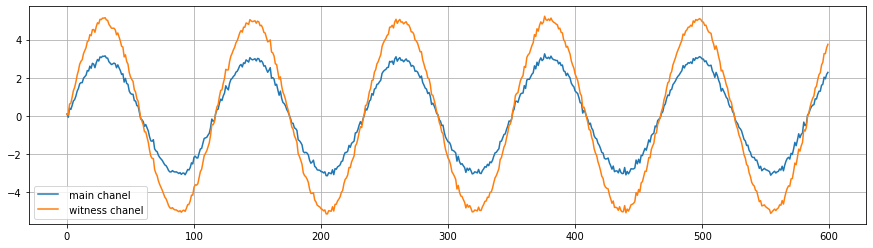

In [11]:
N=600 #time
Ns = 60000 # no. of samples
freq = 514
M = 256 #length of wiener filter
N0 = 0.01
time = np.arange(N)/Ns
# Original Signal
c=np.sin(2*pi*freq*time)
#Noise
noise = np.random.normal(size=N, scale=np.sqrt(N0)) 
#Main chanel
x = 3.0*c+noise
#Witness chanel
y = 5.0*c+noise
plt.figure(figsize=(15,4))
plt.plot(x , label=r' main chanel')
plt.plot(y , label=r' witness chanel')
#plt.xlim(0,600)
plt.legend()
plt.grid()

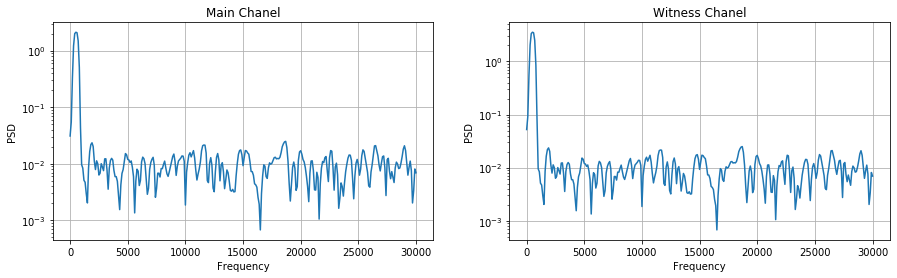

In [12]:
#Amplitude spectrum
plt.figure(figsize=(15,4))
plt.subplot(121)
f1 , psdx = sig.welch(x,Ns,'flattop',1024,scaling='spectrum')
plt.title('Main Chanel')
plt.semilogy(f1,np.sqrt(psdx))
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid()
plt.subplot(122)
f2 , psdy = sig.welch(y,Ns,'flattop',1024,scaling='spectrum')
plt.title('Witness Chanel')
plt.semilogy(f1,np.sqrt(psdy))
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid()

<Figure size 1080x288 with 0 Axes>

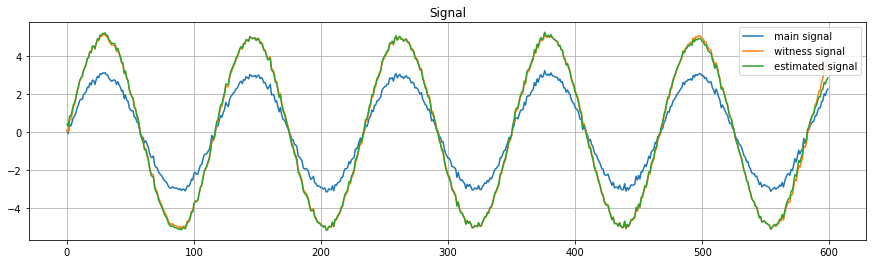

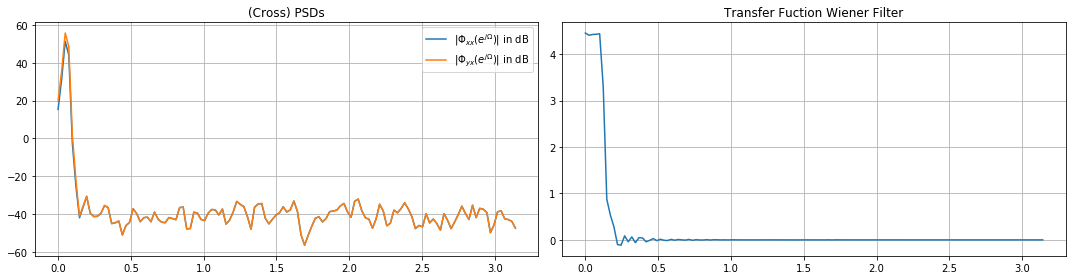

In [13]:
#Wiener Filter Method 1
f,Pxx = sig.csd(x,x,nperseg = M)
f,Pxy = sig.csd(x,y,nperseg = M)
H = Pxy/Pxx
H = H*np.exp(-1j*2*pi/len(H)*np.arange(len(H))*(len(H)//2))
h = np.fft.irfft(H)
plt.figure(figsize=(15,4))
#Estimated signal
OP_y = np.convolve(x,h,mode='same')
#Signal Plot
plt.figure(figsize=(15,4))
plt.plot(x, label=r' main signal')
plt.plot(y, label=r' witness signal')
plt.plot(OP_y, label=r' estimated signal')
plt.title('Signal')
plt.legend()
plt.grid()
#(cross) PSDs plot
t1 = np.linspace(0,pi,num=len(H))
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(t1,20*np.log10(np.abs(0.5*Pxx)), label=r'$| \Phi_{xx}(e^{j \Omega}) |$ in dB')
plt.plot(t1,20*np.log10(np.abs(0.5*Pxy)), label=r'$| \Phi_{yx}(e^{j \Omega}) |$ in dB')
plt.title('(Cross) PSDs')
plt.legend()
plt.grid()
# Wiener Filter Transfer Fuction plot
plt.subplot(122)
plt.plot(t1,20*np.log10(np.abs(H)))
plt.title('Transfer Fuction Wiener Filter')
plt.grid()
plt.tight_layout()

In [14]:
#Wiener Filter Method 2
m = M/10
x_f = segmat(x,m)
y_f = segmat(y,m)
#Transit function
T_f= x_f/y_f
#Wiener function
x_t = fft(x)
y_t = fft(y)
x_est = fft.irfft(np.multiply(Y_t,T_f))
H_t = x_t - x_est
f ,Cxy = sig.cohernce(H_t,x,Ns,window='hann',nperseg=None,noverlap=None,nfft=None,deternd='constant',axis=-1)
plt.plot(f,Cxy)

NameError: name 'segmat' is not defined